<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Matemática e Estatística Aplicada Para Data Science, Machine Learning e IA</font>
## <font color='blue'>Projeto 6</font>
### <font color='blue'>Modelagem Estatística em Indicadores Socioeconômicos</font>

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## Carregando e Compreendendo os Dados

In [3]:
# Carregando os dados
df_dsa = pd.read_csv('dataset.csv')

In [4]:
# Shape
df_dsa.shape

(2938, 22)

In [5]:
# Tipos de dados
df_dsa.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
 Population                        float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
# Amostra dos dados
df_dsa.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2001,Paraguay,2005,Developing,72.1,163.0,3,6.38,20.680373,92.0,0,...,96.0,6.70,96.0,0.2,157.145691,5795494.0,2.3,2.2,0.646,12.3
2291,Seychelles,2005,Developing,72.2,185.0,0,7.82,21.465313,99.0,0,...,99.0,3.91,99.0,0.1,1192.517400,82858.0,6.0,6.4,0.712,12.1
2388,Somalia,2004,Developing,51.2,341.0,49,0.01,0.000000,NaN,12008,...,3.0,NaN,3.0,0.9,NaN,NaN,7.6,7.4,NaN,NaN
543,Chad,2000,Developing,47.6,44.0,41,0.25,21.527016,NaN,3546,...,3.0,6.28,36.0,4.6,166.231785,8342559.0,11.5,11.4,0.000,4.7
940,France,2005,Developing,81.0,93.0,3,12.20,5451.701225,35.0,36,...,98.0,1.60,98.0,0.1,34879.726330,63179356.0,0.6,0.6,0.860,15.5
924,Finland,2005,Developing,78.9,11.0,0,9.95,4816.589613,NaN,1,...,97.0,8.43,97.0,0.1,38969.171630,524696.0,0.9,0.8,0.864,17.1
2040,Poland,2014,Developed,77.3,12.0,2,10.71,243.808475,96.0,0,...,94.0,6.35,98.0,0.1,14341.675000,3811735.0,1.9,2.1,0.850,16.4
633,Costa Rica,2007,Developing,78.9,93.0,1,4.20,150.889148,89.0,0,...,89.0,8.37,89.0,0.1,612.623418,4369469.0,1.9,1.9,0.734,12.8
1342,Jordan,2003,Developing,72.3,127.0,4,0.54,228.783811,97.0,76,...,97.0,9.15,97.0,0.1,1889.213962,5396774.0,3.9,3.9,0.717,13.2
1737,Montenegro,2010,Developing,75.3,115.0,0,6.56,635.484938,9.0,5,...,93.0,6.90,94.0,0.1,6682.281158,619428.0,2.0,2.0,0.787,15.0


## Ajuste Inicial nos Dados

In [7]:
# Colunas
df_dsa.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
# Criando um novo dataset e ajustando o nome das variáveis
# Observe que estamos desconsiderando algumas variáveis:
# percentage expenditure, under-five deaths e Income composition of resources não estão sendo consideradas
# Essas variáveis não apresentam descrição clara na fonte de dados e por isso estão sendo removidas da análise
df = pd.DataFrame({'country': df_dsa['Country'],
                   'life_expectancy': df_dsa['Life expectancy '],
                   'year': df_dsa['Year'],
                   'status': df_dsa['Status'],
                   'adult_mortality': df_dsa['Adult Mortality'],
                   'inf_death': df_dsa['infant deaths'],
                   'alcohol': df_dsa['Alcohol'],
                   'hepatitisB': df_dsa['Hepatitis B'],
                   'measles': df_dsa['Measles '],
                   'bmi': df_dsa[' BMI '],
                   'polio': df_dsa['Polio'],
                   'diphtheria': df_dsa['Diphtheria '],
                   'hiv': df_dsa[' HIV/AIDS'],
                   'gdp': df_dsa['GDP'],
                   'total_expenditure': df_dsa['Total expenditure'],
                   'thinness_till19': df_dsa[' thinness  1-19 years'],
                   'thinness_till9': df_dsa[' thinness 5-9 years'],
                   'school': df_dsa['Schooling'],
                   'population': df_dsa[' Population']})

In [9]:
# Tipos de dados
df.dtypes

country               object
life_expectancy      float64
year                   int64
status                object
adult_mortality      float64
inf_death              int64
alcohol              float64
hepatitisB           float64
measles                int64
bmi                  float64
polio                float64
diphtheria           float64
hiv                  float64
gdp                  float64
total_expenditure    float64
thinness_till19      float64
thinness_till9       float64
school               float64
population           float64
dtype: object

In [10]:
# Shape
df.shape

(2938, 19)

In [11]:
# Dataset
df.head()

,country,life_expectancy,year,status,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
0,Afghanistan,65.0,2015,Developing,263.0,62,0.01,65.0,1154,19.1,6.0,65.0,0.1,584.259210,8.16,17.2,17.3,10.1,33736494.0
1,Afghanistan,59.9,2014,Developing,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0
2,Afghanistan,59.9,2013,Developing,268.0,66,0.01,64.0,430,18.1,62.0,64.0,0.1,631.744976,8.13,17.7,17.7,9.9,31731688.0
3,Afghanistan,59.5,2012,Developing,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0
4,Afghanistan,59.2,2011,Developing,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0


## Análise Exploratória

In [12]:
# Cria um dicionário com a descrição de cada variável
dsa_df_dict = {
    "country": "País de origem dos dados.",
    "life_expectancy": "Expectativa de vida ao nascer, em anos.",
    "year": "Ano em que os dados foram coletados.",
    "status": "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
    "adult_mortality": "Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.",
    "inf_death": "Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.",
    "alcohol": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatitisB": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "measles": "Número de casos de sarampo relatados por 1000 habitantes.",
    "bmi": "Índice médio de massa corporal da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "diphtheria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv": "Prevalência de HIV na população adulta (%).",
    "gdp": "Produto Interno Bruto per capita (em dólares americanos).",
    "total_expenditure": "Gasto total em saúde como porcentagem do PIB.",
    "thinness_till19": "Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%).",
    "thinness_till9": "Prevalência de magreza em crianças de 5 a 9 anos (%).",
    "school": "Número médio de anos de escolaridade.",
    "population": "População total do país."
}

In [13]:
# Agora é só consultar sempre que tiver dúvidas sobre cada variável
dsa_df_dict['life_expectancy']

'Expectativa de vida ao nascer, em anos.'

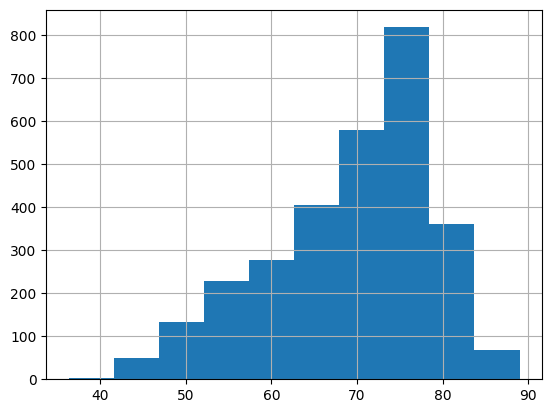

In [14]:
# Plot do histograma da variável alvo (variável quantitativa)
df['life_expectancy'].hist();

In [15]:
# Resumo estatístico (variáveis numéricas)
df.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2928.000000,2938.000000,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2904.000000,2919.000000,2919.000000,2938.000000,2490.000000,2712.00000,2904.000000,2904.000000,2775.000000,2.286000e+03
mean,69.224932,2007.518720,164.796448,30.303948,4.602861,80.940461,2419.592240,38.321247,82.550188,82.324084,1.742103,7483.158469,5.93819,4.839704,4.870317,11.992793,1.275338e+07
std,9.523867,4.613841,124.292079,117.926501,4.052413,25.070016,11467.272489,20.044034,23.428046,23.716912,5.077785,14270.169342,2.49832,4.420195,4.508882,3.358920,6.101210e+07
min,36.300000,2000.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.37000,0.100000,0.100000,0.000000,3.400000e+01
25%,63.100000,2004.000000,74.000000,0.000000,0.877500,77.000000,0.000000,19.300000,78.000000,78.000000,0.100000,463.935626,4.26000,1.600000,1.500000,10.100000,1.957932e+05
50%,72.100000,2008.000000,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,5.75500,3.300000,3.300000,12.300000,1.386542e+06
75%,75.700000,2012.000000,228.000000,22.000000,7.702500,97.000000,360.250000,56.200000,97.000000,97.000000,0.800000,5910.806335,7.49250,7.200000,7.200000,14.300000,7.420359e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,17.60000,27.700000,28.600000,20.700000,1.293859e+09


In [16]:
# Resumo estatístico (variáveis categóricas)
df.describe(include=['object'])

,country,status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [17]:
# Resumo estatístico de todas as variáveis
df.describe(include = 'all')

,country,life_expectancy,year,status,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2938,2928.000000,2938.000000,2938,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2904.000000,2919.000000,2919.000000,2938.000000,2490.000000,2712.00000,2904.000000,2904.000000,2775.000000,2.286000e+03
unique,193,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,69.224932,2007.518720,NaN,164.796448,30.303948,4.602861,80.940461,2419.592240,38.321247,82.550188,82.324084,1.742103,7483.158469,5.93819,4.839704,4.870317,11.992793,1.275338e+07
std,NaN,9.523867,4.613841,NaN,124.292079,117.926501,4.052413,25.070016,11467.272489,20.044034,23.428046,23.716912,5.077785,14270.169342,2.49832,4.420195,4.508882,3.358920,6.101210e+07
min,NaN,36.300000,2000.000000,NaN,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.37000,0.100000,0.100000,0.000000,3.400000e+01
25%,NaN,63.100000,2004.000000,NaN,74.000000,0.000000,0.877500,77.000000,0.000000,19.300000,78.000000,78.000000,0.100000,463.935626,4.26000,1.600000,1.500000,10.100000,1.957932e+05
50%,NaN,72.100000,2008.000000,NaN,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,5.75500,3.300000,3.300000,12.300000,1.386542e+06
75%,NaN,75.700000,2012.000000,NaN,228.000000,22.000000,7.702500,97.000000,360.250000,56.200000,97.000000,97.000000,0.800000,5910.806335,7.49250,7.200000,7.200000,14.300000,7.420359e+06


In [18]:
# Função para o plot da relação da variável alvo com alguns atributos
def dsa_get_pairs(data, alvo, atributos, n):
    
    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

In [19]:
# Variável alvo
alvo = ['life_expectancy']

In [20]:
# Vamos usar alguns atributos
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school'] 

In [21]:
# Descrição da variável
dsa_df_dict['population']

'População total do país.'

In [22]:
# Descrição da variável
dsa_df_dict['hepatitisB']

'Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).'

In [23]:
# Descrição da variável
dsa_df_dict['gdp']

'Produto Interno Bruto per capita (em dólares americanos).'

In [24]:
# Descrição da variável
dsa_df_dict['total_expenditure']

'Gasto total em saúde como porcentagem do PIB.'

In [25]:
# Descrição da variável
dsa_df_dict['alcohol']

'Consumo de álcool per capita (litros de álcool puro por ano).'

In [26]:
# Descrição da variável
dsa_df_dict['school']

'Número médio de anos de escolaridade.'

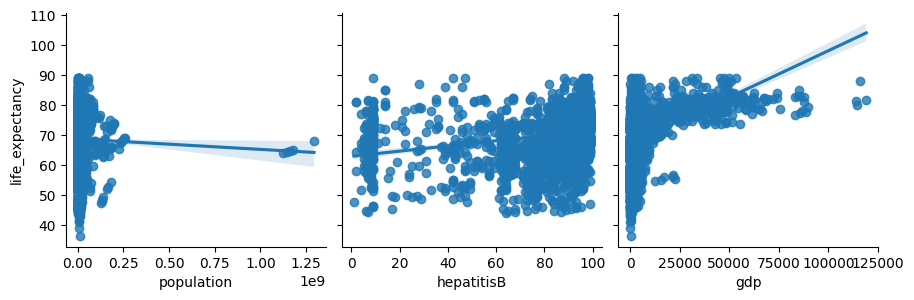

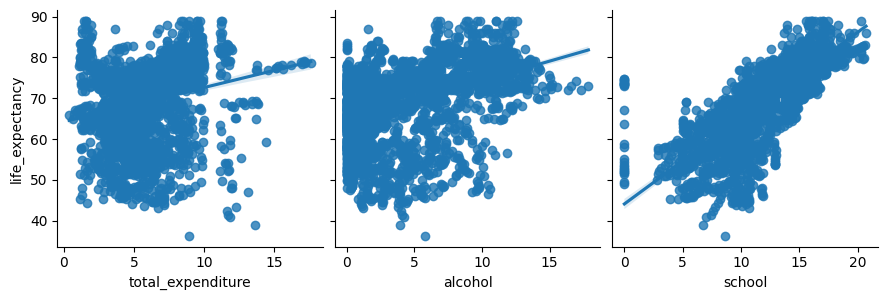

In [27]:
# Verificando outliers
dsa_get_pairs(df, alvo, atributos, 3)

## Detectando Valores Ausentes

In [28]:
# Visualizando o total de linhas por coluna
df.count()

country              2938
life_expectancy      2928
year                 2938
status               2938
adult_mortality      2928
inf_death            2938
alcohol              2744
hepatitisB           2385
measles              2938
bmi                  2904
polio                2919
diphtheria           2919
hiv                  2938
gdp                  2490
total_expenditure    2712
thinness_till19      2904
thinness_till9       2904
school               2775
population           2286
dtype: int64

In [29]:
# Extraindo o total de valores ausentes por coluna
valores_ausentes = df.isnull().sum().sort_values(ascending = False)

In [30]:
print(valores_ausentes)

population           652
hepatitisB           553
gdp                  448
total_expenditure    226
alcohol              194
school               163
thinness_till9        34
thinness_till19       34
bmi                   34
polio                 19
diphtheria            19
life_expectancy       10
adult_mortality       10
hiv                    0
measles                0
inf_death              0
status                 0
year                   0
country                0
dtype: int64


In [31]:
# Calculando o percentual de valores ausentes
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / df.shape[0] 

In [32]:
print(f'{valores_ausentes_percent * 100} %')

population           22.191967
hepatitisB           18.822328
gdp                  15.248468
total_expenditure     7.692308
alcohol               6.603131
school                5.547992
thinness_till9        1.157250
thinness_till19       1.157250
bmi                   1.157250
polio                 0.646698
diphtheria            0.646698
life_expectancy       0.340368
adult_mortality       0.340368
dtype: float64 %


Qual Estratégia Adotar Para o Tratamento de Valores Ausentes?

Vamos discutir algumas opções no videobook do Capítulo 16.

## Detectando Outliers

Vamos começar olhando para as variáveis que têm o maior percentual de valores ausentes.

In [33]:
# Atributos com mais de 5% de valores missing
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school'] 

In [34]:
# Cria um novo dataframe
novo_dataframe = df[atributos]

In [35]:
# Identificação de outliers através do método do IQR (Interquartile Range)
Q1 = novo_dataframe.quantile(0.25)
Q3 = novo_dataframe.quantile(0.75)
IQR = Q3 - Q1

In [36]:
# Definir outliers como aqueles valores que estão fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = ((novo_dataframe < (Q1 - 1.5 * IQR)) | (novo_dataframe > (Q3 + 1.5 * IQR))).sum()

In [37]:
# Total de outliers
outliers

population           294
hepatitisB           254
gdp                  365
total_expenditure     32
alcohol                0
school                44
dtype: int64

In [38]:
# Cria um resumo com os outliers
outliers_summary = pd.DataFrame({'Outliers': outliers, 'Percentual': (outliers / len(novo_dataframe)) * 100})

In [39]:
# Retorna os resultados quando o valor for maior do que zero
outliers_summary[outliers_summary['Outliers'] > 0]

,Outliers,Percentual
population,294,10.006807
hepatitisB,254,8.645337
gdp,365,12.423417
total_expenditure,32,1.089176
school,44,1.497617


## Análise Estatística Para Tratamento de Outliers

In [40]:
# Definindo os limites para filtrar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [41]:
# Filtrando os outliers
novo_df = df[~((novo_dataframe < limite_inferior) | (novo_dataframe > limite_superior)).any(axis=1)]

Considerações Importantes:

- A regra do 1.5 IQR é um método comum para identificar outliers, mas não é uma regra rígida.
- A escolha do multiplicador (1.5) pode variar em diferentes contextos e conjuntos de dados.
- É importante analisar visualmente a distribuição dos dados para confirmar a presença de outliers e ajustar os limites, se necessário.
- Outras técnicas para identificar outliers podem ser utilizadas em conjunto com a regra do IQR.

In [42]:
# Shape
novo_df.shape

(2044, 19)

In [43]:
# Resumo estatístico
novo_df.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


In [44]:
# Valor máximo da população
novo_df.population.max()

np.float64(17899562.0)

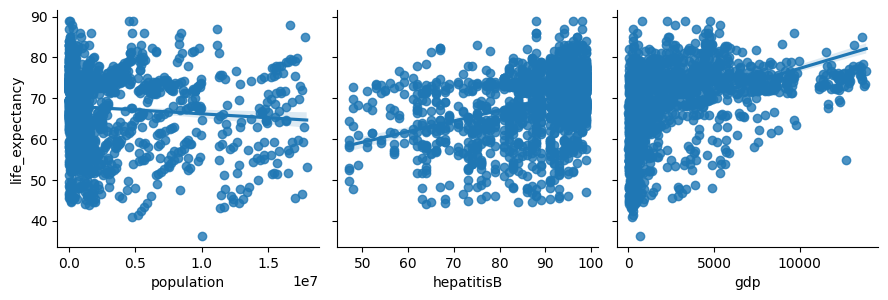

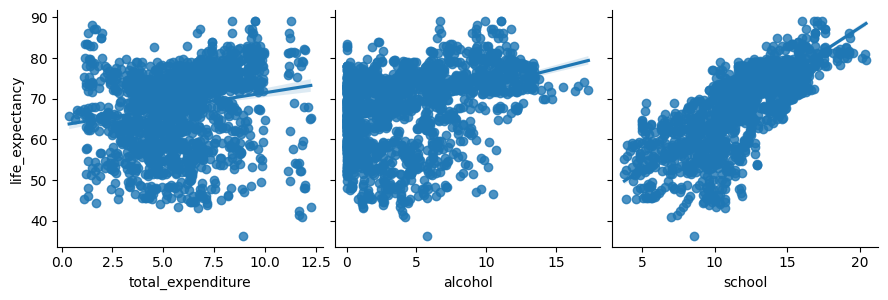

In [45]:
# Verificando outliers
dsa_get_pairs(novo_df, alvo, atributos, 3)

## Análise Estatística Para Tratamento de Valores Ausentes

In [46]:
# Verificando o total de valores ausentes
valores_ausentes = novo_df.isnull().sum().sort_values(ascending = False)

In [47]:
# Checando percentual de valores missing
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df.shape[0] 
print(f'{valores_ausentes_percent * 100} %')

population           24.168297
hepatitisB           19.129159
gdp                  18.395303
total_expenditure     7.876712
alcohol               6.653620
school                6.555773
thinness_till9        0.587084
thinness_till19       0.587084
bmi                   0.587084
life_expectancy       0.391389
adult_mortality       0.391389
polio                 0.146771
diphtheria            0.146771
dtype: float64 %


In [48]:
# Função para o Replace das linhas vazias com a mediana
def impute_median(dados):
    return dados.fillna(dados.median())

In [49]:
novo_df.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


In [50]:
# Removendo valores missing (observe as diferentes formas de notação do lado esquerdo do sinal de igual)
novo_df.loc[:,'population'] = novo_df['population'].transform(impute_median)
novo_df.hepatitisB = novo_df['hepatitisB'].transform(impute_median)
novo_df.alcohol = novo_df['alcohol'].transform(impute_median)
novo_df.total_expenditure = novo_df['total_expenditure'].transform(impute_median)
novo_df.gdp = novo_df['gdp'].transform(impute_median)
novo_df.school = novo_df['school'].transform(impute_median)

In [51]:
# Verificando o total de valores ausentes
valores_ausentes = novo_df.isnull().sum().sort_values(ascending = False)

In [52]:
# Checando percentual de valores missing
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df.shape[0] 
print(f'{valores_ausentes_percent * 100} %')

bmi                0.587084
thinness_till9     0.587084
thinness_till19    0.587084
adult_mortality    0.391389
life_expectancy    0.391389
diphtheria         0.146771
polio              0.146771
dtype: float64 %


In [53]:
# Remove registros com valores nulos
novo_df.dropna(inplace = True)

In [55]:
# Verificando o total de valores ausentes
valores_ausentes = novo_df.isnull().sum().sort_values(ascending = False)

In [56]:
# Checando percentual de valores missing
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df.shape[0] 
print(f'{valores_ausentes_percent * 100} %')

Series([], dtype: float64) %


In [57]:
# Shape
novo_df.shape

(2023, 19)

In [58]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2023 entries, 1 to 2937
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2023 non-null   object 
 1   life_expectancy    2023 non-null   float64
 2   year               2023 non-null   int64  
 3   status             2023 non-null   object 
 4   adult_mortality    2023 non-null   float64
 5   inf_death          2023 non-null   int64  
 6   alcohol            2023 non-null   float64
 7   hepatitisB         2023 non-null   float64
 8   measles            2023 non-null   int64  
 9   bmi                2023 non-null   float64
 10  polio              2023 non-null   float64
 11  diphtheria         2023 non-null   float64
 12  hiv                2023 non-null   float64
 13  gdp                2023 non-null   float64
 14  total_expenditure  2023 non-null   float64
 15  thinness_till19    2023 non-null   float64
 16  thinness_till9     2023 non-n

Usaremos indicadores socioeconômicos independentes de identificação do país. Vamos remover as variáveis categóricas.

In [59]:
# Drop das variáveis
novo_df.drop(['country', 'status'], axis = 1, inplace = True)

In [60]:
# Shape do dataset original
df_dsa.shape

(2938, 22)

In [61]:
# Shape do dataset após a limpeza
novo_df.shape

(2023, 17)

# Continuaremos no Próximo Capítulo.

In [62]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [63]:
#%watermark -v -m

In [64]:
#%watermark --iversions

# Fim